OpenAI

Results for Connection (OpenAI):
Best n_neighbors: 10
Best ROC AUC: 0.9650537634408602
-


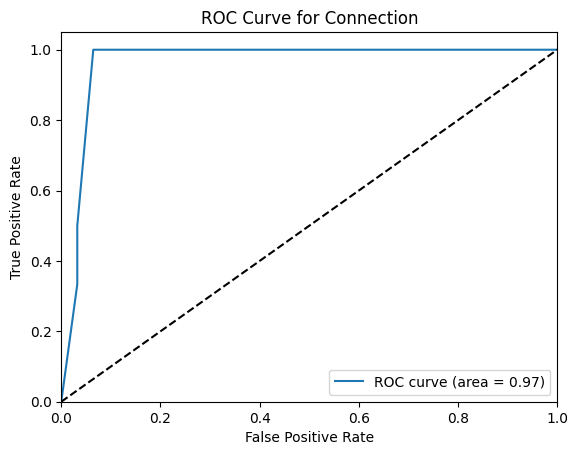

Results for Stress Management (OpenAI):
Best n_neighbors: 4
Best ROC AUC: 0.9285714285714286
-


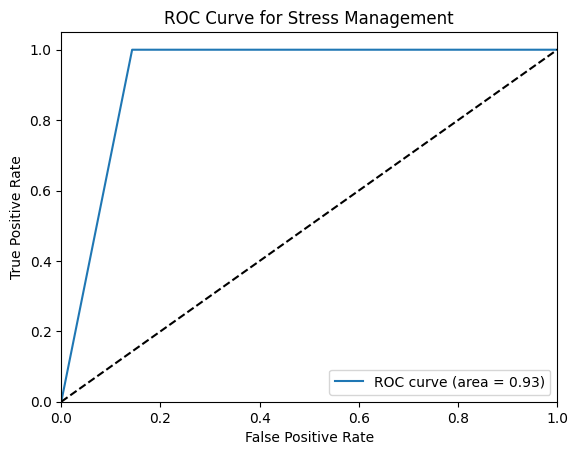

Results for Food (OpenAI):
Best n_neighbors: 9
Best ROC AUC: 0.9838709677419355
-


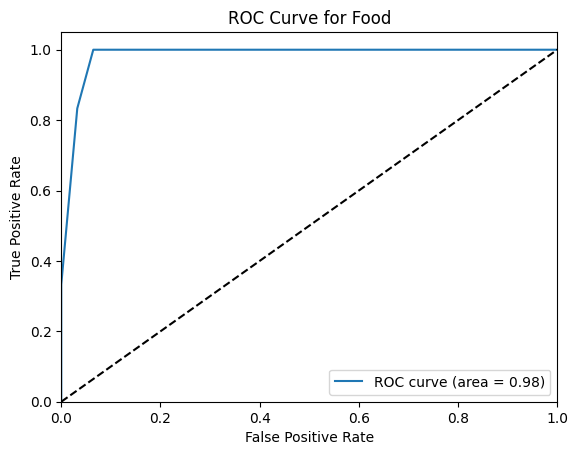

Results for Movement (OpenAI):
Best n_neighbors: 9
Best ROC AUC: 0.9615384615384615
-


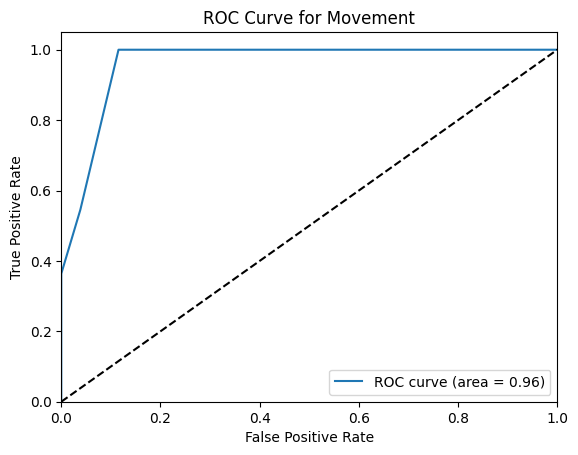

Results for Sleep (OpenAI):
Best n_neighbors: 6
Best ROC AUC: 0.996875
-


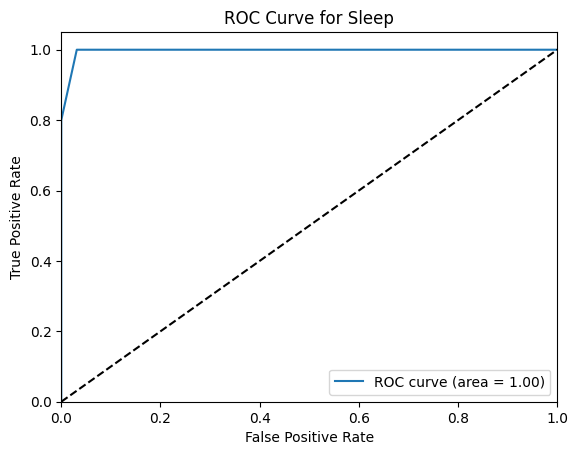

Final results for Connection (OpenAI):
Best n_neighbors: 10
Best ROC AUC: 0.9650537634408602
-
Final results for Stress Management (OpenAI):
Best n_neighbors: 4
Best ROC AUC: 0.9285714285714286
-
Final results for Food (OpenAI):
Best n_neighbors: 9
Best ROC AUC: 0.9838709677419355
-
Final results for Movement (OpenAI):
Best n_neighbors: 9
Best ROC AUC: 0.9615384615384615
-
Final results for Sleep (OpenAI):
Best n_neighbors: 6
Best ROC AUC: 0.996875
-


TFIDF

Results for Connection (TFIDF):
Best n_neighbors: 6
Best ROC AUC: 0.9059139784946235
-


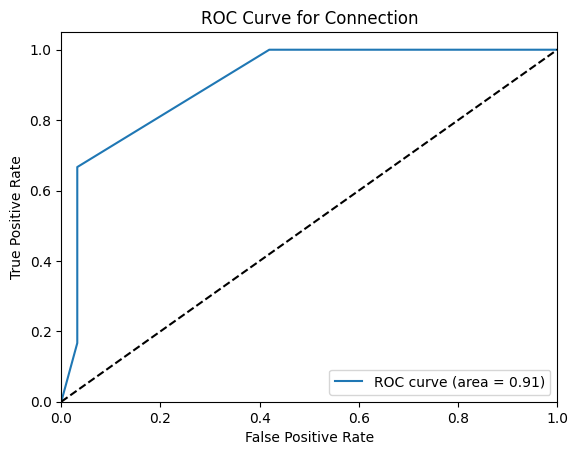

Results for Stress Management (TFIDF):
Best n_neighbors: 6
Best ROC AUC: 0.6285714285714286
-


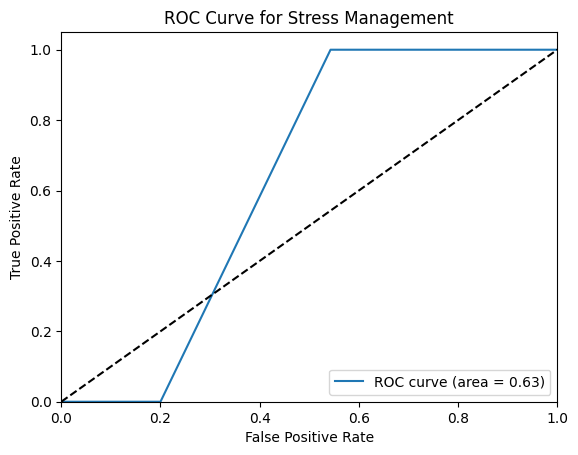

Results for Food (TFIDF):
Best n_neighbors: 3
Best ROC AUC: 0.7634408602150538
-


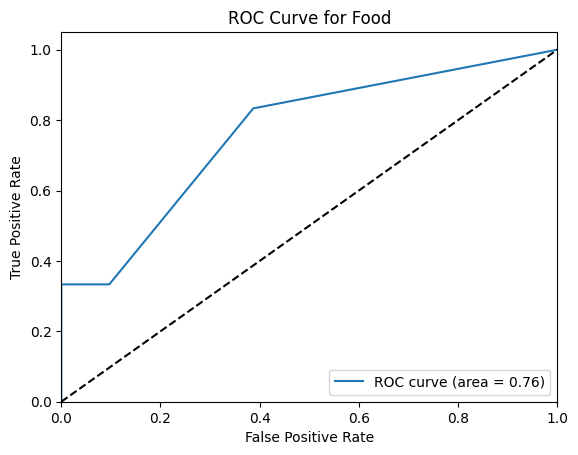

Results for Movement (TFIDF):
Best n_neighbors: 10
Best ROC AUC: 0.6538461538461539
-


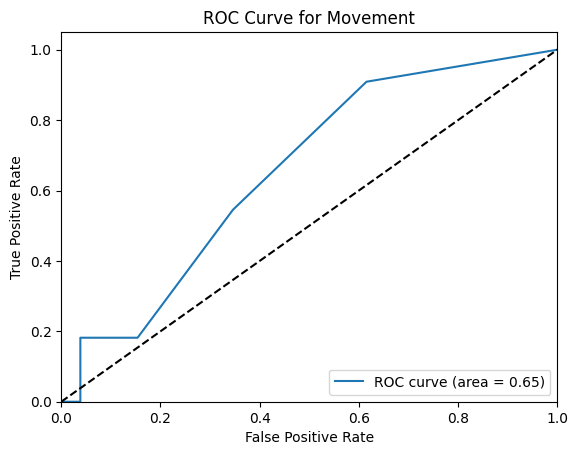

Results for Sleep (TFIDF):
Best n_neighbors: 5
Best ROC AUC: 0.95625
-


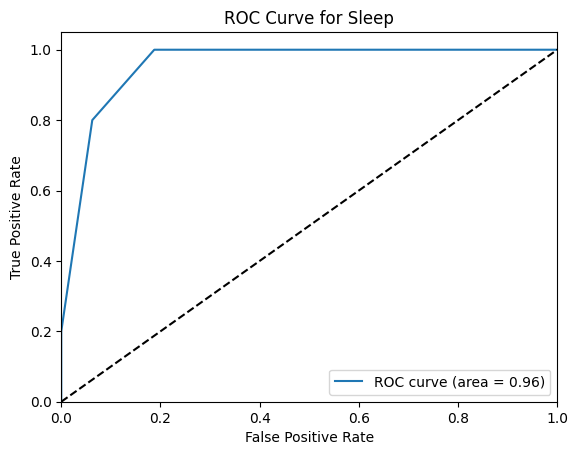

Final results for Connection (TFIDF):
Best n_neighbors: 6
Best ROC AUC: 0.9059139784946235
-
Final results for Stress Management (TFIDF):
Best n_neighbors: 6
Best ROC AUC: 0.6285714285714286
-
Final results for Food (TFIDF):
Best n_neighbors: 3
Best ROC AUC: 0.7634408602150538
-
Final results for Movement (TFIDF):
Best n_neighbors: 10
Best ROC AUC: 0.6538461538461539
-
Final results for Sleep (TFIDF):
Best n_neighbors: 5
Best ROC AUC: 0.95625
-


Sentence Transformers

Results for Connection (Sentence Transformers):
Best n_neighbors: 3
Best ROC AUC: 0.9408602150537635
-


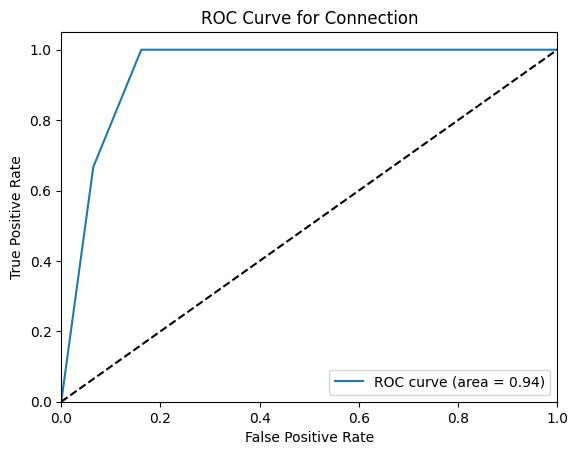

Results for Stress Management (Sentence Transformers):
Best n_neighbors: 3
Best ROC AUC: 0.8857142857142857
-


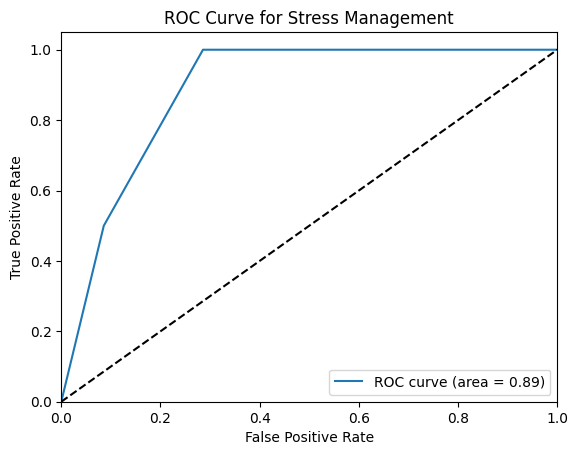

Results for Food (Sentence Transformers):
Best n_neighbors: 6
Best ROC AUC: 0.989247311827957
-


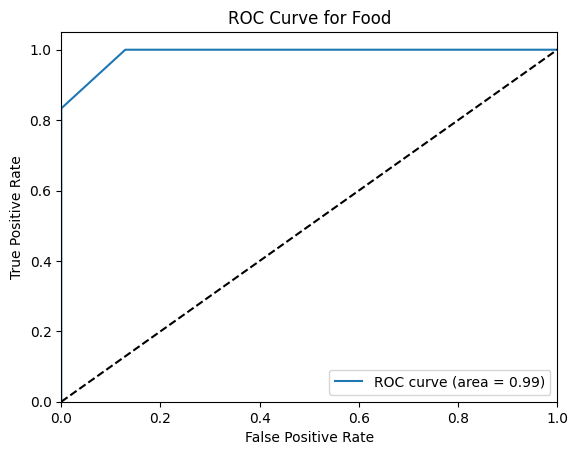

Results for Movement (Sentence Transformers):
Best n_neighbors: 9
Best ROC AUC: 0.951048951048951
-


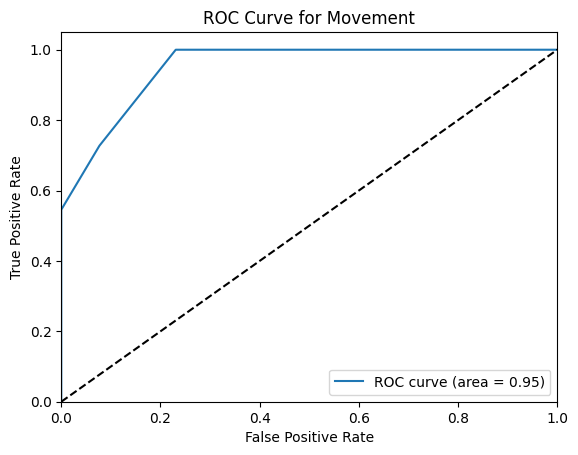

Results for Sleep (Sentence Transformers):
Best n_neighbors: 3
Best ROC AUC: 0.990625
-


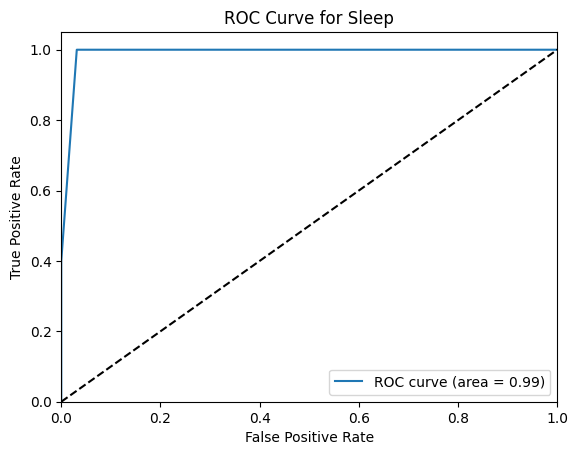

Final results for Connection (Sentence Transformers):
Best n_neighbors: 3
Best ROC AUC: 0.9408602150537635
-
Final results for Stress Management (Sentence Transformers):
Best n_neighbors: 3
Best ROC AUC: 0.8857142857142857
-
Final results for Food (Sentence Transformers):
Best n_neighbors: 6
Best ROC AUC: 0.989247311827957
-
Final results for Movement (Sentence Transformers):
Best n_neighbors: 9
Best ROC AUC: 0.951048951048951
-
Final results for Sleep (Sentence Transformers):
Best n_neighbors: 3
Best ROC AUC: 0.990625
-


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

embeddings_files = ['openai_embeddings.tsv', 'tfidf_embeddings.tsv', 'sentencetransformer_embeddings2.tsv']
metadata_file = 'intentions_metadata.tsv'
titles = ["OpenAI", "TFIDF", "Sentence Transformers"]

for file_index, (file, title) in enumerate(zip(embeddings_files, titles)): 

    embeddings_df = pd.read_csv(file, sep='\t', header=None)
    metadata_df = pd.read_csv(metadata_file, sep='\t')

    X = embeddings_df.values

    journeys = ['Connection', 'Stress Management', 'Food', 'Movement', 'Sleep']

    def train_and_evaluate_knn(X, y, n_neighbors):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        neigh = KNeighborsClassifier(n_neighbors=n_neighbors, metric='cosine')
        neigh.fit(X_train, y_train)
        
        predictions = neigh.predict(X_test)
        probabilities = neigh.predict_proba(X_test)[:, 1]
        
        accuracy = accuracy_score(y_test, predictions)
        roc_auc = roc_auc_score(y_test, probabilities)
        report = classification_report(y_test, predictions, zero_division=1)
        
        return accuracy, roc_auc, report, y_test, probabilities

    print(title + "\n")

    results = {}
    for journey in journeys:
        y = [1 if label == journey else 0 for label in metadata_df['journey_label']]
        
        best_auc = 0
        best_n_neighbors = 0
        for n in range(1, 11):
            accuracy, roc_auc, report, y_test, probabilities = train_and_evaluate_knn(X, y, n)
            if roc_auc > best_auc:
                best_auc = roc_auc
                best_n_neighbors = n
                best_report = report
                best_y_test = y_test
                best_probabilities = probabilities
        
        results[journey] = {
            'best_n_neighbors': best_n_neighbors,
            'best_auc': best_auc,
            'classification_report': best_report
        }

        print(f"Results for {journey} ({title}):")
        print(f"Best n_neighbors: {best_n_neighbors}")
        print(f"Best ROC AUC: {best_auc}")
        print("-")

        fpr, tpr, _ = roc_curve(best_y_test, best_probabilities)
        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC curve (area = {best_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {journey}')
        plt.legend(loc="lower right")
        plt.show()

    for journey, result in results.items():
        print(f"Final results for {journey} ({title}):")
        print(f"Best n_neighbors: {result['best_n_neighbors']}")
        print(f"Best ROC AUC: {result['best_auc']}")
        print("-")

    if file_index < len(embeddings_files) - 1:
        print("\n")


Results for Connection:
Best n_neighbors: 3
Best ROC AUC: 0.9408602150537635
-


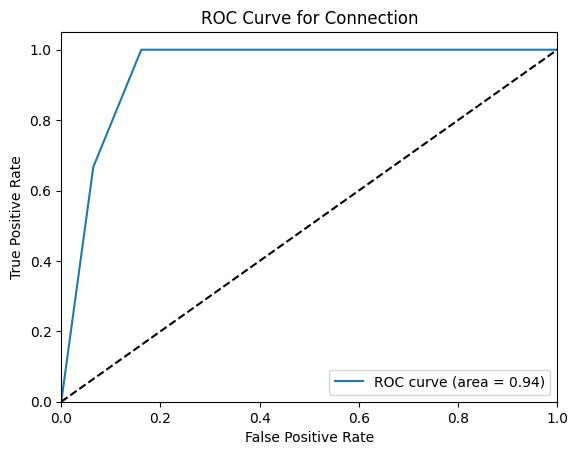

Results for Stress Management:
Best n_neighbors: 3
Best ROC AUC: 0.8857142857142857
-


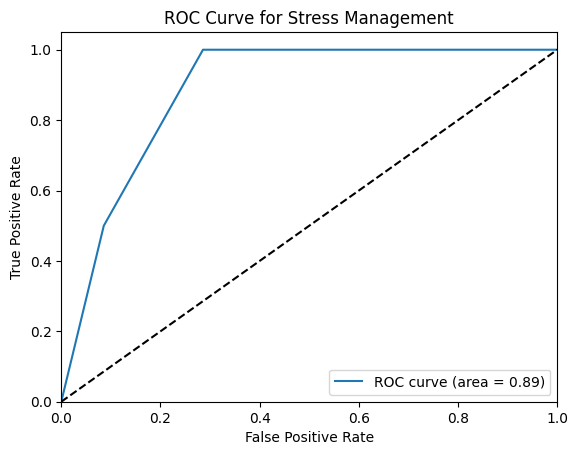

Results for Food:
Best n_neighbors: 6
Best ROC AUC: 0.989247311827957
-


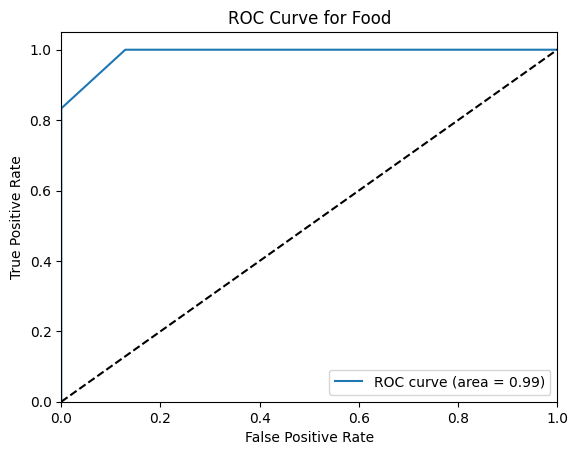

Results for Movement:
Best n_neighbors: 9
Best ROC AUC: 0.951048951048951
-


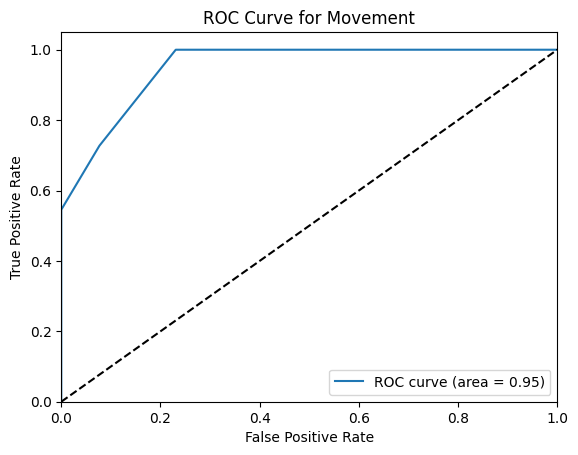

Results for Sleep:
Best n_neighbors: 3
Best ROC AUC: 0.990625
-


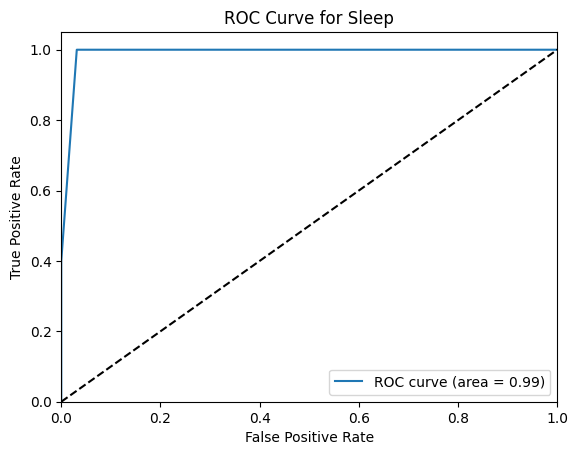

Final results for Connection:
Best n_neighbors: 3
Best ROC AUC: 0.9408602150537635
-
Final results for Stress Management:
Best n_neighbors: 3
Best ROC AUC: 0.8857142857142857
-
Final results for Food:
Best n_neighbors: 6
Best ROC AUC: 0.989247311827957
-
Final results for Movement:
Best n_neighbors: 9
Best ROC AUC: 0.951048951048951
-
Final results for Sleep:
Best n_neighbors: 3
Best ROC AUC: 0.990625
-


In [21]:
import json
from sentence_transformers import SentenceTransformer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

with open('intentions_survey_data_july_2024.json', 'r') as file:
    survey_data = json.load(file)

sentences = [entry['text'] for entry in survey_data]
journeys = [entry['label'] for entry in survey_data]

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(sentences)

embeddings_df = pd.DataFrame(embeddings)
metadata_df = pd.DataFrame({'journey_label': journeys})

X = embeddings_df.values

journey_labels = ['Connection', 'Stress Management', 'Food', 'Movement', 'Sleep']

def train_and_evaluate_knn(X, y, n_neighbors):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors, metric='cosine')
    neigh.fit(X_train, y_train)
    
    predictions = neigh.predict(X_test)
    probabilities = neigh.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, probabilities)
    report = classification_report(y_test, predictions, zero_division=1)
    
    return accuracy, roc_auc, report, y_test, probabilities

results = {}
for journey in journey_labels:
    y = [1 if label == journey else 0 for label in metadata_df['journey_label']]
    
    best_auc = 0
    best_n_neighbors = 0
    for n in range(1, 11):
        accuracy, roc_auc, report, y_test, probabilities = train_and_evaluate_knn(X, y, n)
        if roc_auc > best_auc:
            best_auc = roc_auc
            best_n_neighbors = n
            best_report = report
            best_y_test = y_test
            best_probabilities = probabilities
    
    results[journey] = {
        'best_n_neighbors': best_n_neighbors,
        'best_auc': best_auc,
        'classification_report': best_report
    }
    
    print(f"Results for {journey}:")
    print(f"Best n_neighbors: {best_n_neighbors}")
    print(f"Best ROC AUC: {best_auc}")
    print("-")

    fpr, tpr, _ = roc_curve(best_y_test, best_probabilities)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {best_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {journey}')
    plt.legend(loc="lower right")
    plt.show()

for journey, result in results.items():
    print(f"Final results for {journey}:")
    print(f"Best n_neighbors: {result['best_n_neighbors']}")
    print(f"Best ROC AUC: {result['best_auc']}")
    print("-")
